Importing libraries and files

In [119]:
pip install catboost

In [120]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, RepeatedStratifiedKFold

In [121]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle/2_Bank_Churn_Prediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Kaggle/2_Bank_Churn_Prediction/test.csv")

In [122]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [123]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [124]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [125]:
train.set_index("id", inplace=True)
test.set_index("id", inplace=True)

In [126]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [127]:
test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [129]:
train = train.drop("Surname", axis=1)

In [130]:
test = test.drop("Surname", axis=1)

In [131]:
train["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [132]:
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [133]:
test.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,
165034,15773898,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [134]:
train.shape

(165034, 12)

In [135]:
test.shape

(110023, 11)

In [136]:
numeric_data      = train.drop(["Geography", "Gender", "Tenure", "HasCrCard", "IsActiveMember", "Exited"], axis=1)
numeric_data_test = test.drop(["Geography", "Gender", "Tenure", "HasCrCard", "IsActiveMember"], axis=1)

numeric_data.head()

,CustomerId,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
id,,,,,,
0,15674932,668,33.0,0.00,2,181449.97
1,15749177,627,33.0,0.00,2,49503.50
2,15694510,678,40.0,0.00,2,184866.69
3,15741417,581,34.0,148882.54,1,84560.88
4,15766172,716,33.0,0.00,2,15068.83


In [137]:
numeric_data      = numeric_data.drop("CustomerId", axis=1)
numeric_data_test = numeric_data_test.drop("CustomerId", axis=1)

numeric_data.head()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
id,,,,,
0,668,33.0,0.00,2,181449.97
1,627,33.0,0.00,2,49503.50
2,678,40.0,0.00,2,184866.69
3,581,34.0,148882.54,1,84560.88
4,716,33.0,0.00,2,15068.83


In [138]:
enc = LabelEncoder()

categorical_features = ["Geography", "Gender", "Tenure", "HasCrCard", "IsActiveMember"]

for cat_feat in categorical_features:
    train[cat_feat] = enc.fit_transform(train[cat_feat])
    test[cat_feat] = enc.transform(test[cat_feat])

In [139]:
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,
0,15674932,668,0,1,33.0,3,0.00,2,1,0,181449.97,0
1,15749177,627,0,1,33.0,1,0.00,2,1,1,49503.50,0
2,15694510,678,0,1,40.0,10,0.00,2,1,0,184866.69,0
3,15741417,581,0,1,34.0,2,148882.54,1,1,1,84560.88,0
4,15766172,716,2,1,33.0,5,0.00,2,1,1,15068.83,0


In [140]:
test.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,
165034,15773898,586,0,0,23.0,2,0.00,2,0,1,160976.75
165035,15782418,683,0,0,46.0,2,0.00,1,1,0,72549.27
165036,15807120,656,0,0,34.0,7,0.00,2,1,0,138882.09
165037,15808905,681,0,1,36.0,8,0.00,1,1,0,113931.57
165038,15607314,752,1,1,38.0,10,121263.62,1,1,0,139431.00


In [141]:
numeric_data.head()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
id,,,,,
0,668,33.0,0.00,2,181449.97
1,627,33.0,0.00,2,49503.50
2,678,40.0,0.00,2,184866.69
3,581,34.0,148882.54,1,84560.88
4,716,33.0,0.00,2,15068.83


In [142]:
scaler = StandardScaler()

scaled_numerical_data_train = scaler.fit_transform(numeric_data)
scaled_numerical_data_test  = scaler.transform(numeric_data_test)

In [143]:
scaled_numerical_data_train[0]

array([ 0.14413459, -0.57807434, -0.8831633 ,  0.81429756,  1.36948561])

In [144]:
features = ["CreditScore", "Age", "Balance", "NumOfProducts", "EstimatedSalary"]

for i, feat in enumerate(features):
    l = []

    for j in range(len(scaled_numerical_data_train)):
        l.append(scaled_numerical_data_train[j][i])

    train[feat] = l

    l = []

    for j in range(len(scaled_numerical_data_test)):
        l.append(scaled_numerical_data_test[j][i])

    test[feat]  = l

In [145]:
X = train.drop("Exited", axis=1)
y = train["Exited"]
X_test = test

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=82)

In [147]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [148]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [149]:
cat = CatBoostClassifier(verbose=0, random_state=82)
parameters = {'iterations': [200],
              'learning_rate': [0.1],
              'depth': [5]}

clf = GridSearchCV(cat, parameters, cv=100)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameters: {'depth': 5, 'iterations': 200, 'learning_rate': 0.1}
Best score: 0.8658382079691692


In [150]:
print("score on test: " + str(clf.score(X_test, y_test)))
print("score on train: "+ str(clf.score(X_train, y_train)))

score on test: 0.8640288423667707
score on train: 0.8676861551046376


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Confusion Matrix:
[[24767  1189]
 [ 3299  3752]]


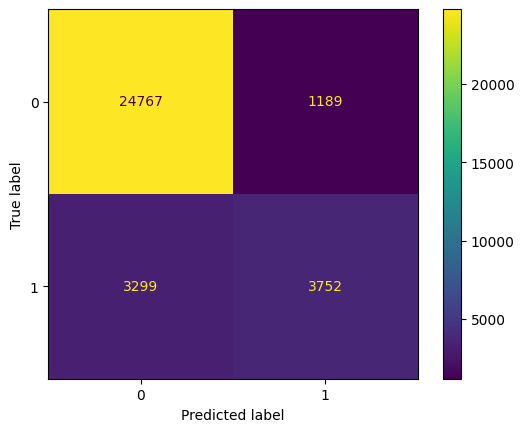

In [152]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [153]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     25956
           1       0.76      0.53      0.63      7051

    accuracy                           0.86     33007
   macro avg       0.82      0.74      0.77     33007
weighted avg       0.86      0.86      0.85     33007



In [159]:
predictions = clf.predict(test)

In [169]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test.index,
    'Exited': predictions
})

In [170]:
submission_df["Exited"]

0         0
1         1
2         0
3         0
4         0
         ..
110018    0
110019    0
110020    0
110021    0
110022    0
Name: Exited, Length: 110023, dtype: int64

In [171]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      110023 non-null  int64
 1   Exited  110023 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


In [172]:
submission_df.to_csv('/content/drive/MyDrive/Kaggle/2_Bank_Churn_Prediction/submission.csv', index=False)